,model,resampler,avg_pr_auc,std,count
20,Elastic_L30_C1,Cluster Centroids,0.233272,0.255019,5
23,Elastic_L30_C1,Random Undersample,0.224561,0.285332,5
4,Elastic_L0_C10,No Resampling,0.218724,0.265881,5
32,Elastic_L50_C5,Random Undersample,0.216688,0.284662,5
14,Elastic_L100_C10,Random Undersample,0.216155,0.284451,5
41,Elastic_L70_C10,Random Undersample,0.215347,0.284448,5
31,Elastic_L50_C5,No Resampling,0.213244,0.270092,5
21,Elastic_L30_C1,Manual Upsampling,0.212714,0.269188,5
5,Elastic_L0_C10,Random Undersample,0.212704,0.283796,5
29,Elastic_L50_C5,Cluster Centroids,0.212604,0.252226,5


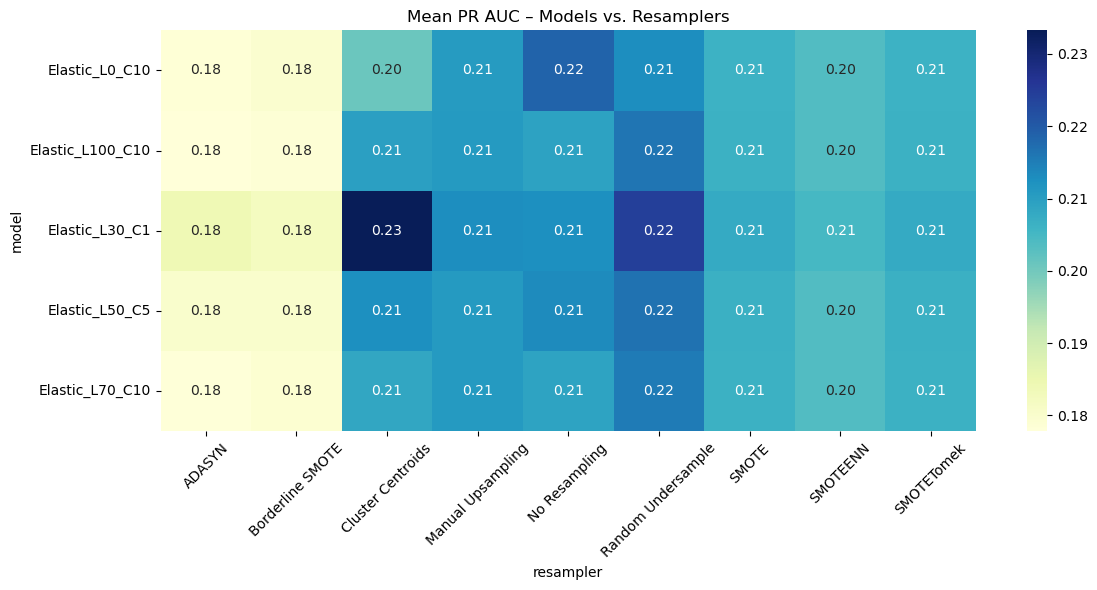

In [1]:

# 📊 Robust Leaderboard: Rare Event Evaluation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the leaderboard CSV
df = pd.read_csv("logs/leaderboard.csv")

# ------------------------
# 1. Mean PR AUC per Combo
# ------------------------

summary = (
    df.groupby(["model", "resampler"])
      .agg(avg_pr_auc=("pr_auc", "mean"), std=("pr_auc", "std"), count=("dataset", "count"))
      .reset_index()
      .sort_values("avg_pr_auc", ascending=False)
)

display(summary)

# ------------------------
# 2. Heatmap Visualization
# ------------------------

pivot = df.pivot_table(index="model", columns="resampler", values="pr_auc", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mean PR AUC – Models vs. Resamplers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
